In [1]:
# TODO:
# - Handle emojis
# - Handle special characters (display '&' instead of "&amp;")
# - Remove HTML tags (like "<br>")
# - Remove duplicates in text
# - Remove empty/NaN/null values
# - Translate text to english
# - Add confusion matrix

# Finance News Sentiments Classifier

## Requirements

In [2]:
# `language_check` dependency must be used with Java 8
! sudo apt install openjdk-8-jdk -y
! sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

# Working version of `language_check`
! pip install git+https://github.com/MCFreddie777/language-check.git

! pip install POT # pycontractions dependency
! pip install contractions # For counting contractions
! pip install pycontractions # For expanding contractions




The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libice-dev libpthread-stubs0-dev librsvg2-common libsm-dev libx11-dev
  libxau-dev libxcb1-dev libxdmcp-dev libxt-dev openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11proto-dev xorg-sgml-doctools
  xtrans-dev
Suggested packages:
  gvfs libice-doc libsm-doc libx11-doc libxcb-doc libxt-doc openjdk-8-demo
  openjdk-8-source visualvm libnss-mdns fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libice-dev libpthread-stubs0-dev librsvg2-common libsm-dev libx11-dev
  libxau-dev libxcb1-dev libxdmcp-dev libxt-dev openjdk-8-jdk
  openjdk-8-jdk-headless openjdk-8-jre openjdk-8-jre-headless x11proto-dev
  xorg-sgml-doctools xtrans-dev
0 upgraded, 21 newly installed, 0 to remove and 39 

## Data Processing

### Dataset Retrieval

In [3]:
import pandas as pd
from pandas import DataFrame

dataset_path: str = "/kaggle/input/news-sentiment-analysis-for-stock-data-by-company/djia_news copy.csv/djia_news copy.csv"
column_names: list[str] = ["sentiment", "text"]
X: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace",
    usecols=[0, 2]
)
print(f"X shape: {X.shape}")
    
dataset_path: str = "/kaggle/input/news-sentiment-analysis-for-stock-data-by-company/nasdaq.csv/nasdaq.csv"
X1: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace",
    usecols=[0, 2]
)
print(f"X1 shape: {X1.shape}")
    
# Concatenate dataframes
X: DataFrame = pd.concat([X, X1])
print(f"Concatenated dataframe shape: {X.shape}")

# Map integers labels to string for data visualization
X["sentiment"] = X["sentiment"].map({
    0: "negative",
    1: "positive",
    2: "neutral"
})

# TODO: Remove links
X.sample(5)

X shape: (2381, 2)
X1 shape: (13181, 2)
Concatenated dataframe shape: (15562, 2)


,sentiment,text
1151,negative,Honeywell Home Smart Home Security Starter Kit...
820,negative,Greek MP says he was offered 2 to 3 million eu...
976,negative,Prototypes of Razer triple screen gaming lapto...
2172,negative,U.S. government awards $2.1B to Sanofi-GSK cor...
9772,positive,The premier of British Columbia Christy Clark ...


In [4]:
dataset_path: str = "/kaggle/input/stockmarket-sentiment-dataset/stock_data.csv"
column_names: list[str] = ["text", "sentiment"]
X1: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)

# Reorder columns
X1: DataFrame = X1.reindex(columns=["sentiment", "text"])
X1.sample(5)

# Map integers labels to string for data visualization
X1["sentiment"] = X1["sentiment"].map({
    -1: "negative",
    1: "positive",
})
X1.sample(5)

X: DataFrame = pd.concat([X, X1])
X.sample(5)

,sentiment,text
4846,neutral,With the discovery in southern China of human ...
7302,positive,Groupon Does Good: Deals Feed Families in Need...
11978,negative,Federal Reserve Refuses to Submit to an Audit ...
7173,negative,Χταπόδι… κλέβει κάμερα GoPro από δύτη
11624,negative,Bali rated #1 in Asia and #5 Island in World b...


In [5]:
dataset_path: str = "/kaggle/input/twitter-financial-news-sentiment-dataset/sent_train.csv"
column_names: list[str] = ["text", "sentiment"]
X1: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)
    
dataset_path: str = "/kaggle/input/twitter-financial-news-sentiment-dataset/sent_valid.csv"
column_names: list[str] = ["text", "sentiment"]
X2: DataFrame = pd.read_csv(
    dataset_path,
    header=0,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)

X1: DataFrame = pd.concat([X1, X2])
X1.sample(5)

# Reorder columns
X1: DataFrame = X1.reindex(columns=["sentiment", "text"])
X1.sample(5)

# Map integers labels to string for data visualization
X1["sentiment"] = X1["sentiment"].map({
    0: "negative",
    1: "positive",
    2: "neutral"
})
X1.sample(5)

# Concatenate dataframes
print(f"X shape: {X.shape}")
print(f"X1 shape: {X1.shape}")

X: DataFrame = pd.concat([X, X1])
print(f"Concatenated dataframe shape: {X.shape}")


X.sample(5)

X shape: (21353, 2)
X1 shape: (11931, 2)
Concatenated dataframe shape: (33284, 2)


,sentiment,text
5970,negative,It may be the largest bank robbery in history:...
2339,positive,Bristol-Myers +3% premarket on Q4 beat
1281,positive,adio spot w/ user today. Talking IWM leadersh...
8723,positive,Moderna: Covid vaccine shows nearly 95% protec...
4422,negative,Charles Darwin’s On the Origin of Species has ...


In [6]:
dataset_path: str = "/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv"
column_names: list[str] = ["sentiment", "text"]
X1: DataFrame = pd.read_csv(
    dataset_path,
    names=column_names,
    encoding="utf-8",
    encoding_errors="replace"
)
print(f"X shape: {X.shape}")
print(f"X1 shape: {X1.shape}")


# Concatenate dataframes
X: DataFrame = pd.concat([X, X1])
print(f"Concatenated dataframe shape: {X.shape}")

X.sample(5)

X shape: (33284, 2)
X1 shape: (4846, 2)
Concatenated dataframe shape: (38130, 2)


,sentiment,text
1629,negative,AAP DownTend seem confirmed after broken the t...
2297,positive,Quarterly diluted EPS on continuing operations...
6477,neutral,"Edelweiss Launches Bharat Bond ETF, Targets Rs..."
1342,negative,@TotesTravel : Watch CNBC's full interview wit...
9512,negative,Advance Research on Pediatric Epilepsy Therape...


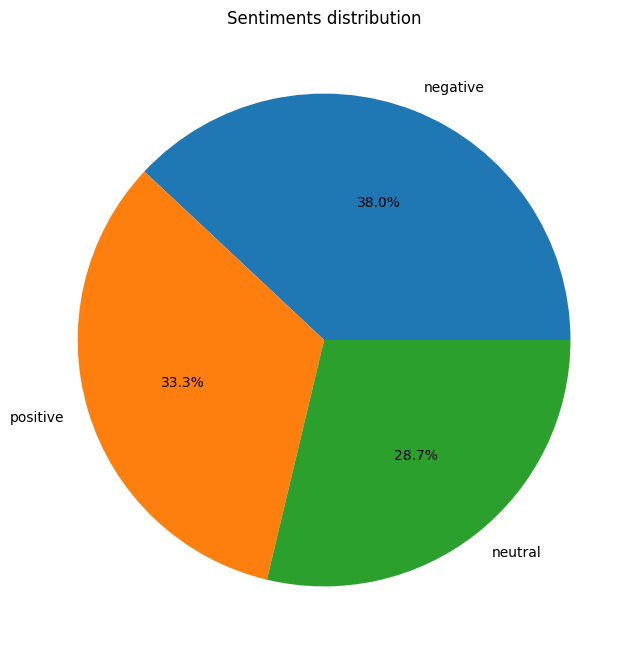

In [7]:
import matplotlib.pyplot as plt
from pandas import Series

label_counts: Series = X["sentiment"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Sentiments distribution')
plt.show()

### Data Cleaning

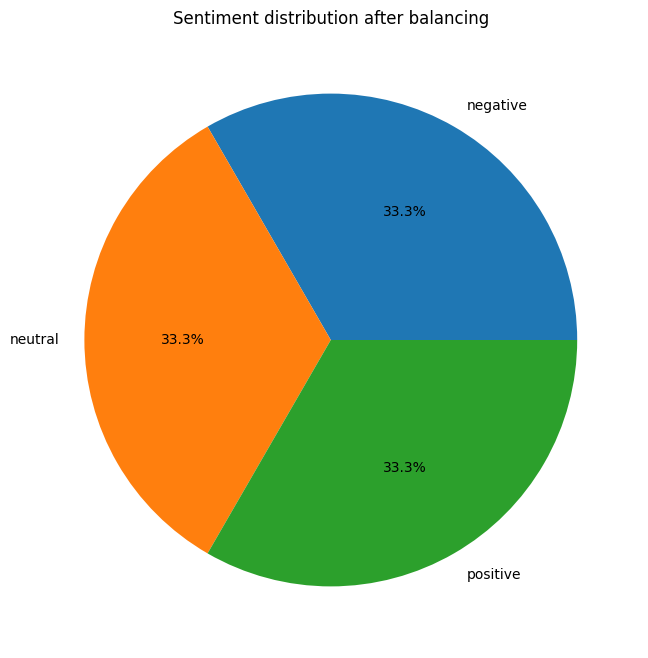

In [8]:
# Balance dataframe so that each sentiment has the same number of elements
min_label_count: int = label_counts.values[-1]
negative_sample: DataFrame = X[X["sentiment"] == "negative"].sample(min_label_count)
neutral_sample: DataFrame = X[X["sentiment"] == "neutral"].sample(min_label_count)
positive_sample: DataFrame = X[X["sentiment"] == "positive"].sample(min_label_count)
X: DataFrame = pd.concat([negative_sample, neutral_sample, positive_sample])

# Visualize sentiment distribution after balancing
label_counts: Series = X["sentiment"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Sentiment distribution after balancing')
plt.show()

In [9]:
# Remove leading and trailing whitespaces and newlines characters
X["text"].str.strip()

6180         Chain store sales fall back from recent pace
376     US Boeing 747 crash in Afghanistan - Huge Expl...
2655    Global 3D Printing Market Assessment Covering ...
419     Caterpillar trucks Xerox machines and Samsonit...
4209    Jul. 18 -- Police are looking for a man who th...
                              ...                        
3067    HBAN Huntington Bank aunches Spartans Debit Ca...
1568    Remember the McDonalds theory of war?  The Rus...
9071    At times the debate in the face of Maggie nood...
3203    DDD worked with 3d design software today. clic...
2695    India is now producing the world’s cheapest so...
Name: text, Length: 32862, dtype: object

In [10]:
import re
from pandas import Index

# Remove all URLs
regex: str = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
urls: list[list[str]] = [re.findall(regex, x) for x in X.text]
urls: list[str] = [x for x1 in urls for x in x1 if x]
print(f"Number of URLs present in the dataset: {len(urls)}")

print("Cleaning...")
X.text.replace(inplace=True, regex=regex, value="")
    
urls: list[list[str]] = [re.findall(regex, x) for x in X.text]
urls: list[str] = [x for x1 in urls for x in x1 if x]
print(f"Remaining URLs: {len(urls)}")

Number of URLs present in the dataset: 6791
Cleaning...
Remaining URLs: 0


In [11]:
# Translate text to english

### Expand Contractions

In [12]:
from pycontractions import Contractions

path_to_model: str = "/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin"

# Contractions object initialization takes a bit of time...  
contractions: Contractions = Contractions(path_to_model)
contractions.load_models()

In [13]:
import contractions as contractions_counter

# Contractions expansion takes time too...
print("Expanding contractions...")
X.text = X.text.apply(lambda x: list(contractions.expand_texts([x], precise=True))[0])

X.text.sample(10)

Expanding contractions...


1993     Facebook is ‘the new cigarettes for our societ...
10353    Financial Express Selects Radware to Guarantee...
7891     Businessmen bribed foreign officials to import...
3520     TJX Q3 TJX International same-store sales up 6...
3374     MyPillow’s CEO a Trump supporter says Bed Bath...
7986     Hedge Funds Are Crazy About PC Connection, Inc...
1226     user Prop_Trader user --- you have the January...
502      Ruukki 's delivery includes steel structures ,...
2622     GOOG this market leader is heading to next Cen...
2041     The company 's net sales in 2010 totalled MEUR...
Name: text, dtype: object

In [14]:
# Make final dataset downloadable
path: str = "/kaggle/working/dataset.csv"
X.to_csv(path, index=False)

In [15]:
# Encode labels from string to integer
X["sentiment"] = X["sentiment"].map({
    'negative': 0,
    'neutral' : 1,
    'positive': 2
})

# Extract labels
Y: Series = X.pop("sentiment")

Y.sample(5)

3389     2
264      1
10854    0
2552     1
4547     1
Name: sentiment, dtype: int64

In [16]:
# Get the number of unique words in all the texts
def get_vocab_size(strings: Series) -> int:
    unique_words: set[str] = set()
    for string in strings:
        for word in string.split():
            unique_words.add(word)
    return len(unique_words)


vocab_size: int = get_vocab_size(X.squeeze())
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 68642


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X,
    Y,
    test_size=0.25
)

print(f"X_train length: {len(X_train)}")
print(f"Y_train length: {len(Y_train)}")
print(f"X_val length: {len(X_val)}")
print(f"Y_val length: {len(Y_val)}")

X_train length: 24646
Y_train length: 24646
X_val length: 8216
Y_val length: 8216


## Model Building

### Neural Network Definition

In [18]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras

sequence_length = 64

vectorize_layer = keras.layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
    name="text-vectorization"
)

vectorize_layer.adapt(X_train)

In [19]:
import tensorflow as tf
from keras import Sequential
from keras.src.layers import Conv1D, Dense, Dropout, Embedding, InputLayer, GlobalMaxPooling1D

embedding_dim = 128

model = Sequential([
    InputLayer((1,), dtype=tf.string),
    vectorize_layer,
    Embedding(vocab_size, embedding_dim, name="embedding"),
    Dropout(0.2, name="dropout-1"),
    Conv1D(64, 5, padding="valid", activation="relu", strides=3, name="conv-1d"),
    GlobalMaxPooling1D(name="global-max-pooling-1d"),
    Dense(32, activation="relu", name="dense"),
    Dropout(0.2, name="dropout-2"),
    Dense(3, activation="softmax", name="output")
], name="finance-news-sentiments-classifier")

model.summary()

Model: "finance-news-sentiments-classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text-vectorization              │ (None, 64)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 64, 128)        │     8,786,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout-1 (Dropout)             │ (None, 64, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv-1d (Conv1D)                │ (None, 20, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global-max-pooling-1d           │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout-2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,829,379 (33.68 MB)

 Trainable params: 8,829,379 (33.68 MB)

 Non-trainable params: 0 (0.00 B)

### Fitting

In [20]:
from keras.src.callbacks import History

epochs = 10

model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
    optimizer="adam",
)

history: History = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=epochs
)

Epoch 1/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.9953 - sparse_categorical_accuracy: 0.4702 - val_loss: 0.7390 - val_sparse_categorical_accuracy: 0.6721
Epoch 2/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.4754 - sparse_categorical_accuracy: 0.8136 - val_loss: 0.7772 - val_sparse_categorical_accuracy: 0.6893
Epoch 3/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1782 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.9841 - val_sparse_categorical_accuracy: 0.6715
Epoch 4/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9729 - val_loss: 1.1736 - val_sparse_categorical_accuracy: 0.6654
Epoch 5/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9799 - val_loss: 1.3661 - val_sparse_categorical_accuracy: 0.6607
Epoch 6/10
771/771 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0444 - sparse_categorical_accuracy: 0.9830 - val_loss: 1.4194 - val_sparse_categorical_accuracy: 0.6687
Epo

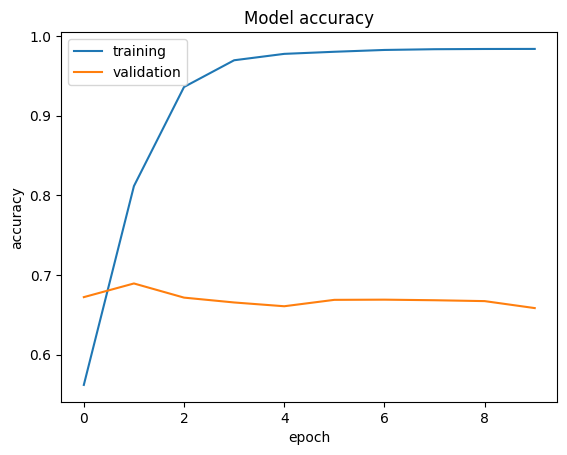

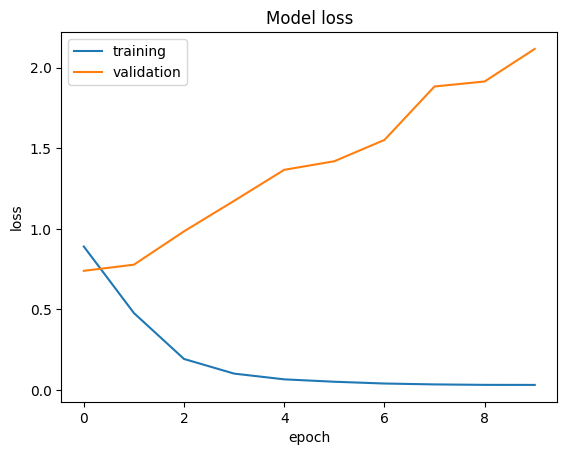

In [21]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


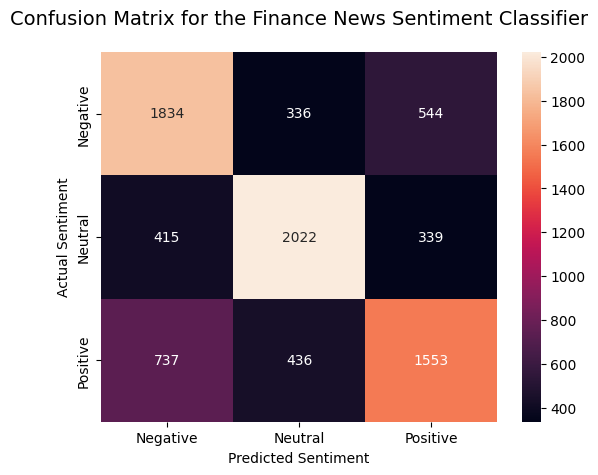

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

Y_pred = np.argmax(model.predict(X_val), axis=1)

conf_matrix = confusion_matrix(Y_val, Y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt="d")
ax.set_xlabel("Predicted Sentiment")
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Actual Sentiment")
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_title("Confusion Matrix for the Finance News Sentiment Classifier", fontsize=14, pad=20)
plt.show()